# MCC Precipitation
## Carl Doedens

In [1]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Set your username and token here!
username = 'cdoedens'
token = '3ad8489884ef9883'

# Set the datastream and start/enddates
datastream = 'kcgwbpluvio2M1.a1'
startdate = '2024-04-15'
enddate = '2025-02-03'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] kcgwbpluvio2M1.a1.20241005.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20241102.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20240907.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20241118.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20241010.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20241212.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20250114.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20241128.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20250203.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20241208.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20240423.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20241007.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20240419.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20241101.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20241029.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20240711.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20241113.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20241120.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20240904.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1

In [3]:
ds_wb = act.io.read_arm_netcdf(result)
ds_wb

<xarray.Dataset> Size: 49MB
Dimensions:           (time: 424800)
Coordinates:
  * time              (time) datetime64[ns] 3MB 2024-04-15 ... 2025-02-03T23:...
Data variables: (12/22)
    base_time         (time) datetime64[ns] 3MB 2024-04-15 ... 2025-02-03
    time_offset       (time) datetime64[ns] 3MB 2024-04-15 ... 2025-02-03T23:...
    intensity_rt      (time) float32 2MB dask.array<chunksize=(1440,), meta=np.ndarray>
    accum_rtnrt       (time) float32 2MB dask.array<chunksize=(1440,), meta=np.ndarray>
    accum_nrt         (time) float32 2MB dask.array<chunksize=(1440,), meta=np.ndarray>
    accum_total_nrt   (time) float32 2MB dask.array<chunksize=(1440,), meta=np.ndarray>
    ...                ...
    volt_min          (time) float32 2MB dask.array<chunksize=(1440,), meta=np.ndarray>
    ptemp             (time) float32 2MB dask.array<chunksize=(1440,), meta=np.ndarray>
    intensity_rtnrt   (time) float32 2MB dask.array<chunksize=(1440,), meta=np.ndarray>
    lat               (time) float32 2MB -40.68 -40.68 -40.68 ... -40.68 -40.68
    lon               (time) float32 2MB 144.7 144.7 144.7 ... 144.7 144.7 144.7
    alt               (time) float32 2MB 80.0 80.0 80.0 80.0 ... 80.0 80.0 80.0
Attributes: (12/19)
    command_line:          wbpluvio2_ingest -s kcg -f M1
    Conventions:           ARM-1.2
    process_version:       ingest-wbpluvio2-1.1-0.el7
    dod_version:           wbpluvio2-a1-1.0
    input_source:          /data/collection/kcg/kcgwbpluvio2M1.00/DL2.wbpluvi...
    site_id:               kcg
    ...                    ...
    doi:                   10.5439/1338194
    history:               created by user dsmgr on machine prod-proc2.adc.ar...
    _file_dates:           ['20240415', '20240416', '20240417', '20240418', '...
    _file_times:           ['000000', '000000', '000000', '000000', '000000',...
    _datastream:           kcgwbpluvio2M1.a1
    _arm_standards_flag:   1

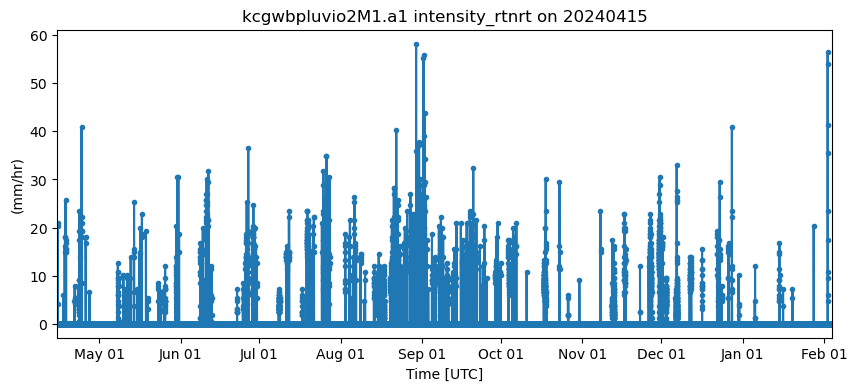

In [5]:
# Let's take a look at the quality control information associated with a variable from the MPL
variables = [
    'intensity_rtnrt',
    # 'accum_nrt',
    # 'accum_rtnrt',
    # 'accum_total_nrt',
    # 'bucket_rt',
    # 'bucket_nrt',
]
size = len(variables)

# wbpluvio.clean.cleanup()

# # Apply corrections for the ceilometer, correcting for the vertical height
# wbpluvio = act.corrections.correct_mpl(wbpluvio)


display = act.plotting.TimeSeriesDisplay(ds_wb, figsize=(10, 4*size), subplot_shape=(size,))

for i, var in enumerate(variables):
    # Plot up the variable in the first plot
    display.plot(var, subplot_index=(i,))

# Plot up the QC variable in the second plot
# display.qc_flag_block_plot(variable, subplot_index=(1,))
plt.show()

In [7]:
# make pandas DF with intensity and hourly avg
rain_df = pd.DataFrame(
    {'intensity_rtnrt': ds_wb['intensity_rtnrt'].values,
    'time': ds_wb['intensity_rtnrt'].time}
).set_index('time')
rain_df = rain_df.rename(columns={0:'intensity_rtnrt'})

rain_df["intensity_hourly_avg"] = rain_df["intensity_rtnrt"].rolling(window=60, center=True, min_periods=1).mean()

In [37]:
rain_df

,intensity_rtnrt,intensity_hourly_avg
time,,
2024-04-15 00:00:00,0.0,0.0
2024-04-15 00:01:00,0.0,0.0
2024-04-15 00:02:00,0.0,0.0
2024-04-15 00:03:00,0.0,0.0
2024-04-15 00:04:00,0.0,0.0
...,...,...
2025-02-03 23:55:00,0.0,0.0
2025-02-03 23:56:00,0.0,0.0
2025-02-03 23:57:00,0.0,0.0


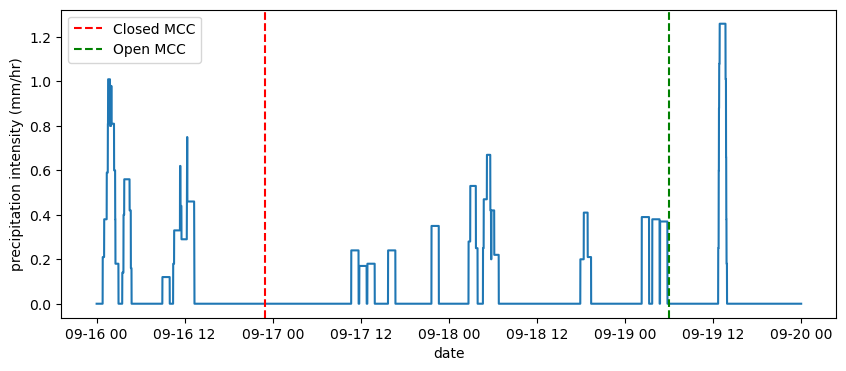

In [42]:
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(rain_df['intensity_hourly_avg'].loc['2024-09-16 00:00:00': '2024-09-20 00:00:00'])
ax.set_xlabel('date')
ax.set_ylabel('precipitation intensity (mm/hr)')

date1 = pd.to_datetime("2024-09-16 23:00:00")
date2 = pd.to_datetime("2024-09-19 06:00:00")
plt.axvline(x=date1, color="r", linestyle="--", label="Closed MCC")
plt.axvline(x=date2, color="g", linestyle="--", label="Open MCC")
plt.legend()

# plt.savefig('images/precipitation-time-series.png')

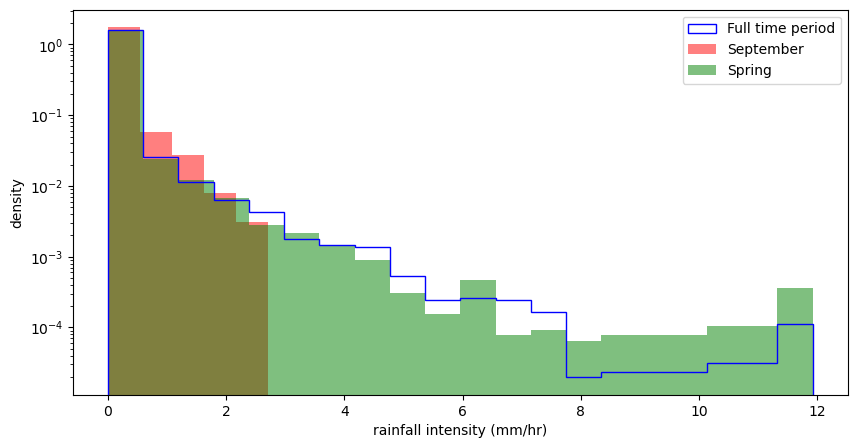

In [22]:
# PDFs of rain intensity
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(
    rain_df['intensity_hourly_avg'],
    density=True,
    bins=20,
    label='Full time period',
    color='blue',
    histtype='step',
    log=True
)
ax.hist(
    rain_df['intensity_hourly_avg'].loc['2024-09-01 00:00:00': '2024-09-30 00:00:00'],
    density=True,
    bins=5,
    alpha=0.5,
    label='September',
    color='red',
    log=True
)
ax.hist(
    rain_df['intensity_hourly_avg'].loc['2024-09-01 00:00:00': '2024-11-30 00:00:00'],
    density=True,
    bins=20,
    alpha=0.5,
    label='Spring',
    color='green',
    log=True
)
ax.legend()
ax.set_xlabel('rainfall intensity (mm/hr)')
ax.set_ylabel('density')

plt.savefig('images/precip-intensity-pdfs.png')

In [10]:
# AOSMET - Just to get the wind data!
datastream = 'kcgaosmetS2.a1'
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_met = act.io.read_arm_netcdf(result)

ds_met.clean.cleanup()
ds_met = act.qc.arm.add_dqr_to_qc(ds_met)
ds_met.qcfilter.datafilter(rm_assessments=['Bad'], del_qc_var=False)

[DOWNLOADING] kcgaosmetS2.a1.20241122.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20240503.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20241007.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20240928.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20240618.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20240518.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20240615.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20240901.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20240706.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20241221.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20250128.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20250121.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20240731.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20240801.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20240610.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20240818.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20240418.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20240521.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20250126.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20241121.000000.nc
[DOWNLOADING] kcgaosmetS2.a1.20240530.00

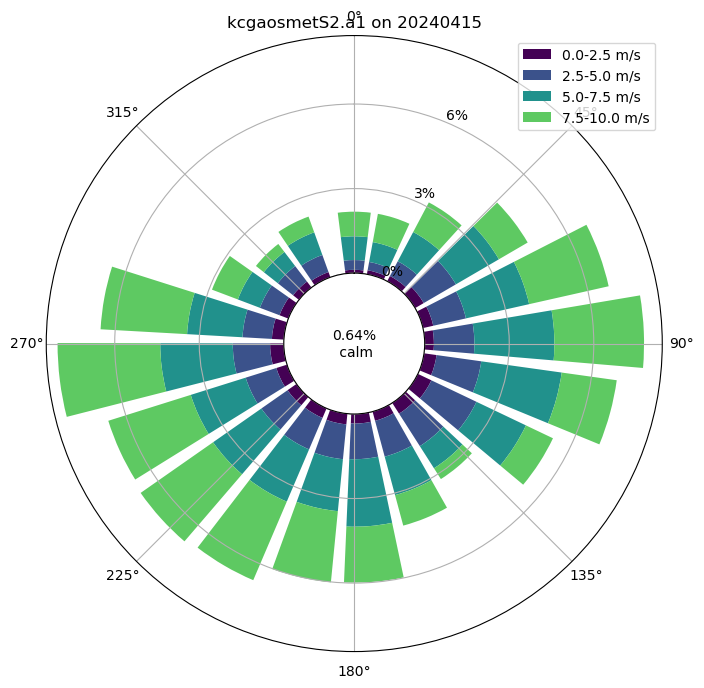

In [28]:
# Now we can plot up a wind rose of that entire month's worth of data
windrose = act.plotting.WindRoseDisplay(ds_met, figsize=(10,8))
windrose.plot('wind_direction', 'wind_speed', spd_bins=np.linspace(0, 10, 5))
windrose.axes[0].legend()
plt.savefig('images/wind-rose.png')
plt.show()

/srv/conda/envs/notebook/lib/python3.10/site-packages/act/plotting/windrosedisplay.py:358: RuntimeWarning: Mean of empty slice
  arr.append(np.nanmean(data[idx]))


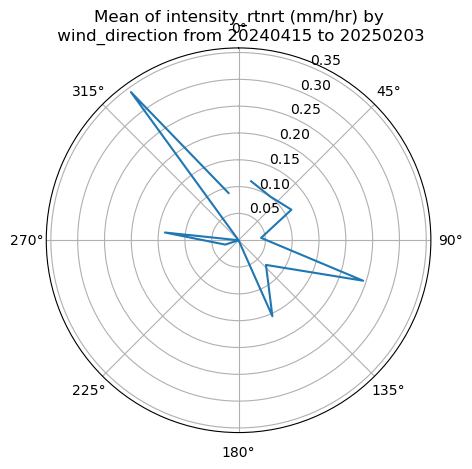

In [29]:
ds_combined = xr.merge([ds_met, ds_wb], compat='override')

# Plot out the data rose using the WindRose display object
display = act.plotting.WindRoseDisplay(ds_combined)
display.plot_data('wind_direction', 'wind_speed', 'intensity_rtnrt', num_dirs=15, plot_type='line', line_plot_calc='mean')

plt.savefig('images/precipitation-rose.png')
plt.show()